<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_1_Modelling_Eric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Setting the Table: Load the libs & Load the data

In [ ]:
# Load the library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

# We can import a certain function from a pack, therefore removing the need to "prefixing the function [eg: pd.readtable()]"
from numpy import arange
from pandas import read_table
from pandas import set_option
# from pandas import scatter_matrix [why it's not working?]

# Importing Sklearn functions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



**Variables to Keep**
- Age
- trust_vac
- believe_VacEffect
- vac_boost_beyond
- vac_mandatory
- Covid_is_dangerous (0.05)
- freq_avoidCrowd (0.04)
- freq_avoidMixOthers (0.04)
- freq_handSanitizer (0.04)
- worried_covid (0.04)

In [ ]:
# Set the URL and cols to keep
# too many NaN in vac_booster_beyond - discard
github_url = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignment_1/main/clean_df.csv'
col_predictors = ['age','trust_Vac','believe_VacEffect','vac_mandatory','covid_is_dangerous','freq_avoidCrowd','freq_avoidMixOthers','freq_handSanitizer','worried_COVID']
col_target = ['is_confident']
# read the csv
covid_predictors = pd.read_csv(github_url, usecols= col_predictors) #read the dataset
covid_target = pd.read_csv(github_url, usecols= col_target)
# check
print(covid_predictors.info())
print('^' * 50)
print(covid_target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  6129 non-null   int64 
 1   trust_Vac            6129 non-null   int64 
 2   worried_COVID        6129 non-null   int64 
 3   believe_VacEffect    6129 non-null   int64 
 4   freq_handSanitizer   6129 non-null   int64 
 5   freq_avoidCrowd      6129 non-null   int64 
 6   covid_is_dangerous   6129 non-null   int64 
 7   freq_avoidMixOthers  6129 non-null   int64 
 8   vac_mandatory        6129 non-null   object
dtypes: int64(8), object(1)
memory usage: 431.1+ KB
None
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   is_confident  6129 non-null   bool 
dtypes: bool(1)
me

# 2 Dummy Variables & Standardization
vac_mandatory        6129 non-null   object

## 2.1 Dummy Variables

In [ ]:
covid_predictors['vac_mandatory'] = covid_predictors['vac_mandatory'].map({'Yes':1, 'No':0})
covid_predictors['vac_mandatory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6129 entries, 0 to 6128
Series name: vac_mandatory
Non-Null Count  Dtype
--------------  -----
6129 non-null   int64
dtypes: int64(1)
memory usage: 48.0 KB


In [ ]:
covid_predictors.describe().round(2)

,age,trust_Vac,worried_COVID,believe_VacEffect,freq_handSanitizer,freq_avoidCrowd,covid_is_dangerous,freq_avoidMixOthers,vac_mandatory
count,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00
mean,50.24,1.95,2.98,3.50,4.24,4.03,4.24,3.77,0.74
std,18.04,0.98,1.33,1.34,1.09,1.25,2.03,1.37,0.44
min,18.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,35.00,1.00,2.00,3.00,4.00,3.00,3.00,3.00,0.00
50%,51.00,2.00,3.00,4.00,5.00,4.00,4.00,4.00,1.00
75%,66.00,3.00,4.00,5.00,5.00,5.00,6.00,5.00,1.00
max,90.00,3.00,5.00,5.00,5.00,5.00,7.00,5.00,1.00


## 2.2 Standardize

In [ ]:
# Use StandardScaler fit_transform can do two steps together.
# be careful: set_output should be ahead of fit_transform, otherwise it is already transformed into nparray
covid_predictors_scaled = MinMaxScaler().set_output(transform ='pandas').fit_transform(covid_predictors)
# check the work
covid_predictors_scaled.describe().round(2)

,age,trust_Vac,worried_COVID,believe_VacEffect,freq_handSanitizer,freq_avoidCrowd,covid_is_dangerous,freq_avoidMixOthers,vac_mandatory
count,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00,6129.00
mean,0.45,0.65,0.50,0.63,0.81,0.76,0.54,0.69,0.74
std,0.25,0.33,0.33,0.33,0.27,0.31,0.34,0.34,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.24,0.33,0.25,0.50,0.75,0.50,0.33,0.50,0.00
50%,0.46,0.67,0.50,0.75,1.00,0.75,0.50,0.75,1.00
75%,0.67,1.00,0.75,1.00,1.00,1.00,0.83,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# 3 KNN (Grid Search with Cross-validation) & plot the result

In [ ]:
covid_predictors_scaled.shape

(6129, 9)

In [ ]:
# set seed
seed = 42
# set parameter grid
k_values = np.arange(1,60)
param_grid = dict(n_neighbors = k_values)
# set CV folds
num_folds = 10
kfold = KFold(n_splits= num_folds, shuffle = True, random_state= seed)
# Set scoring criteria
scoring = 'accuracy'
# Set model
model = KNeighborsClassifier()


In [ ]:
# set GridsearchCV model
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)

# Train the model with covid_predictors_scaled
grid_results = grid.fit(covid_predictors_scaled, covid_target.values.flatten())

In [ ]:
# Which one is best?
print("Best accuracy is %f is when K= %s" % (grid_results.best_score_, grid_results.best_params_['n_neighbors']))

Best accuracy is 0.716916 is when K= 51


In [ ]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean,stdev,param in zip(means, stds, params):
  print("%f, (%f) with %r" % (mean,stdev,param))

0.655895, (0.019651) with {'n_neighbors': 1}
0.618535, (0.018148) with {'n_neighbors': 2}
0.672703, (0.020161) with {'n_neighbors': 3}
0.665197, (0.021766) with {'n_neighbors': 4}
0.687058, (0.016426) with {'n_neighbors': 5}
0.677271, (0.015662) with {'n_neighbors': 6}
0.688689, (0.020099) with {'n_neighbors': 7}
0.683307, (0.015426) with {'n_neighbors': 8}
0.694727, (0.021278) with {'n_neighbors': 9}
0.692282, (0.015889) with {'n_neighbors': 10}
0.696849, (0.019865) with {'n_neighbors': 11}
0.691955, (0.022860) with {'n_neighbors': 12}
0.703211, (0.020819) with {'n_neighbors': 13}
0.699949, (0.019716) with {'n_neighbors': 14}
0.702560, (0.017583) with {'n_neighbors': 15}
0.702232, (0.017386) with {'n_neighbors': 16}
0.703864, (0.016789) with {'n_neighbors': 17}
0.707454, (0.018410) with {'n_neighbors': 18}
0.707289, (0.019310) with {'n_neighbors': 19}
0.704516, (0.020966) with {'n_neighbors': 20}
0.707940, (0.019254) with {'n_neighbors': 21}
0.709900, (0.018888) with {'n_neighbors': 2

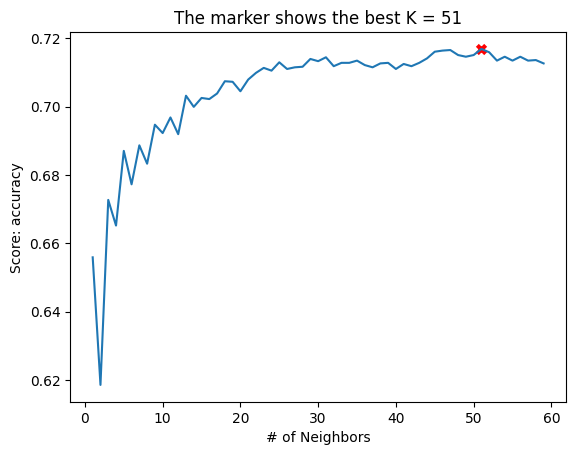

In [ ]:
plt.plot(k_values, means)
plt.title("The marker shows the best K = %i" % grid_results.best_params_['n_neighbors'])
plt.xlabel("# of Neighbors")
plt.ylabel("Score: %s" % scoring)
plt.scatter(grid_results.best_params_['n_neighbors'],grid_results.best_score_, marker='x', c = 'r', linewidths=3)

## Choosing the best K to balance overfitting and underfitting (ignoring the predictor information)
we can choose either of the following:
- K = 13 is the first time accuracy reached 70%
- K = 23 is the first time accuracy reached 71%
- K = 51 is the best accuracy number based on the model (71.69%)
- but considering that the improvement of 13 to 51 is only a bit more than 1%, while reducing K by 75%, we may choose K=13 as the best K.
- Intuition (**don't write this para into report**): when we have higher number of predictors, a higher number of K will encompass more dimensional space and make KNN more inaccurate.

## Splitting Train-test and get a confusion matrix

In [ ]:
# Load the data
best_k = 13

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(covid_predictors_scaled, covid_target.values.flatten(), random_state = seed)

# Use fir the model and make predictions
clf = KNeighborsClassifier(n_neighbors = best_k)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[393 293]
 [157 690]]


In [ ]:
# Calculate confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize = 'all')
print("Confusion Matrix - Normalized:")
print(cm_norm)

Confusion Matrix - Normalized:
[[0.25636008 0.19112851]
 [0.10241357 0.45009785]]


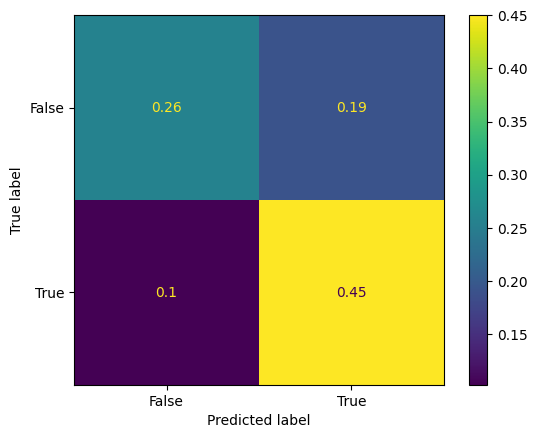

In [ ]:
# Visualization

cm_norm_plot = ConfusionMatrixDisplay(cm_norm, display_labels=clf.classes_)
cm_norm_plot.plot()